# AirBnB capstone project




# Predicting Airbnb price with Machine Learning

In [1]:
import pandas as pd
import numpy as np

from IPython.display import display
import matplotlib.pyplot as plt

# Set iPython's max column width to 200
pd.set_option('display.max_columns', 200)

#reading raw data
in_file = 'listings.csv'
full_data = pd.read_csv(in_file)


full_data.head()
full_data.tail()

/Users/shabnam/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
8528,40544136,https://www.airbnb.com/rooms/40544136,20191204162709,2019-12-04,Entire apartment in Pacific Heights/beautiful ...,A place for zen with a beautiful patio and bac...,NaN,A place for zen with a beautiful patio and bac...,none,NaN,NaN,NaN,NaN,NaN,We would appreciate if don’t wear any shoes in...,NaN,NaN,https://a0.muscache.com/im/pictures/cac19a4c-0...,NaN,39425074,https://www.airbnb.com/users/show/39425074,Sam,2015-07-24,"San Francisco, California, United States",NaN,within a day,50%,NaN,f,https://a0.muscache.com/im/pictures/user/3cffe...,https://a0.muscache.com/im/pictures/user/3cffe...,NaN,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"San Francisco, CA, United States",NaN,Pacific Heights,NaN,San Francisco,CA,94115,San Francisco,"San Francisco, CA",US,United States,37.79017,-122.43869,f,Apartment,Entire home/apt,2,1.5,1.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Indoor fi...",NaN,$95.00,NaN,NaN,$0.00,$50.00,1,$0.00,30,180,30,30,180,180,30.0,180.0,yesterday,t,2,32,62,337,2019-12-04,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,"{""SAN FRANCISCO""}",t,f,flexible,f,f,2,1,1,0,NaN
8529,40546145,https://www.airbnb.com/rooms/40546145,20191204162709,2019-12-04,Huge Private Room; 8 min to Dwntwn SF & SFO,We are kind and friendly people looking for wo...,NaN,We are kind and friendly people looking for wo...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/b220ab0d-f...,NaN,313682675,https://www.airbnb.com/users/show/313682675,Connor,2019-12-02,US,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/b9a50...,https://a0.muscache.com/im/pictures/user/b9a50...,Bayview,0.0,0.0,"['email', 'phone']",t,f,"San Francisco, CA, United States",NaN,Bayview,NaN,San Francisco,CA,94124,San Francisco,"San Francisco, CA",US,United States,37.71977,-122.39214,t,Apartment,Private room,2,1.0,1.0,NaN,Real Bed,"{Wifi,Heating,""Smoke detector"",""Carbon monoxid...",NaN,$55.00,NaN,NaN,NaN,NaN,1,$0.00,1,1125,1,1,1125,1125,1.0,1125.0,today,t,30,59,59,59,2019-12-04,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,City Registration Pending,"{""SAN FRANCISCO""}",t,f,flexible,f,f,2,0,2,0,NaN
8530,40547706,https://www.airbnb.com/rooms/40547706,20191204162709,2019-12-04,Welcome onboard a beautiful Sail

In [2]:
type(full_data)

pandas.core.frame.DataFrame

In [3]:
full_data.shape

(8533, 106)

In [4]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 6.9+ MB


In [5]:
#show all the columns name
full_data.columns
for col in full_data.columns:
    print(col)
    #full_data.col.unique()


id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_ni

In [6]:
full_data.index

RangeIndex(start=0, stop=8533, step=1)

In [7]:
full_data.neighbourhood.unique()

array(['Duboce Triangle', 'Inner Sunset', 'Bernal Heights', 'Cole Valley',
       'Alamo Square', 'Mission District', 'Potrero Hill', 'Nob Hill',
       'Lower Haight', 'Hayes Valley', 'Union Square', 'Haight-Ashbury',
       'The Castro', 'South Beach', 'Noe Valley', 'Western Addition/NOPA',
       'Richmond District', 'Presidio Heights', 'Glen Park', 'Dogpatch',
       'Ingleside', 'Pacific Heights', 'Downtown', 'Financial District',
       'Twin Peaks', 'Russian Hill', 'Outer Sunset', 'Marina', 'Excelsior',
       'Chinatown', 'Civic Center', 'Tenderloin', 'Balboa Terrace',
       'Bayview', 'Telegraph Hill', 'Diamond Heights', 'Cow Hollow',
       'West Portal', 'North Beach', 'Mission Terrace', 'SoMa',
       'Sunnyside', 'Parkside', 'Lakeshore', "Fisherman's Wharf",
       'Crocker Amazon', 'Oceanview', 'Portola', 'Presidio', 'Forest Hill',
       'Visitacion Valley', 'Mission Bay', 'Sea Cliff', 'Japantown',
       'Daly City', nan], dtype=object)

In [8]:
#Get a series object containing the count of unique elements in each column of dataframe
uniqueValues = full_data.nunique().sort_values()
print("Count of unique values in each column:")
print(uniqueValues)

Count of unique values in each column:
xl_picture_url                         0
host_acceptance_rate                   0
medium_url                             0
neighbourhood_group_cleansed           0
thumbnail_url                          0
country_code                           1
scrape_id                              1
country                                1
has_availability                       1
experiences_offered                    1
is_business_travel_ready               1
host_is_superhost                      2
is_location_exact                      2
host_has_profile_pic                   2
host_identity_verified                 2
calendar_last_scraped                  2
jurisdiction_names                     2
instant_bookable                       2
require_guest_profile_picture          2
require_guest_phone_verification       2
last_scraped                           2
market                                 2
requires_license                       2
state             

In [9]:
#columns that have only one unique value can be dropped
columns_to_drop = ['country_code', 'scrape_id', 'country', 'has_availability', 'experiences_offered', 'is_business_travel_ready' ]   
df = full_data.drop(columns_to_drop, axis = 1)
#note: default axis is 0 which is row. needed to specify axis=1

df.shape


(8533, 100)

In [10]:
# URL columns are not needed , they will be dropped
columns_with_url = ['listing_url', 'thumbnail_url', 'medium_url', 'picture_url',
'xl_picture_url','host_thumbnail_url','host_picture_url','host_url']
df = df.drop(columns_with_url, axis = 1)

In [11]:
df.shape


(8533, 92)

In [12]:
#full_data.iloc[2:3,]
#full_data.scrape_id

In [12]:
df.head()

,id,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,2019-12-04,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,1169,Holly,2008-07-31,"San Francisco, California, United States",We are a family with 2 boys born in 2009 and 2...,within a day,86%,NaN,t,Duboce Triangle,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"San Francisco, CA, United States",Duboce Triangle,Western Addition,NaN,San Francisco,CA,94117,San Francisco,"San Francisco, CA",37.76931,-122.43386,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",NaN,$170.00,"$1,120.00","$4,200.00",$100.00,$100.00,2,$25.00,1,30,1,1,30,30,1.0,30.0,7 weeks ago,2,4,12,71,2019-12-04,226,51,2009-07-23,2019-11-17,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,STR-0001256,"{""SAN FRANCISCO""}",f,moderate,f,f,1,1,0,0,1.79
1,3850,2019-12-04,Charming room for two,Your own private room plus access to a shared ...,This room can fit two people. Nobody else will...,Your own private room plus access to a shared ...,"This is a quiet, safe neighborhood on a substa...",House Rule footnotes: 1.\tI don’t allow check ...,Public transit service to my house is outstand...,"During the hours of 7:00 to 22:00, your access...","I live at the house in my own bedroom, and I w...",Airbnb has no default house rules that hosts c...,4921,Kevin,2008-12-08,"San Francisco, California, United States",I am a retired software developer now raising ...,within an hour,100%,NaN,t,Inner Sunset,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"San Francisco, CA, United States",Inner Sunset,Inner Sunset,NaN,San Francisco,CA,94131,San Francisco,"San Francisco, CA",37.75402,-122.45805,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,Breakfast,""Free street ...",NaN,$99.00,NaN,NaN,$0.00,$10.00,2,$20.00,1,5,1,1,5,5,1.0,5.0,today,18,44,74,74,2019-12-04,175,51,2009-07-16,2019-12-01,95.0,10.0,10.0,10.0,10.0,10.0,10.0,t,STR-0000346,"{""SAN FRANCISCO""}",f,strict_14_with_grace_period,f,f,3,0,3,0,1.38
2,5858,2019-12-05,Creative Sanctuary,NaN,We live in 

In [14]:
# this can be dropped as well last_scraped,calendar_last_scraped 
df.last_scraped.unique()
df.calendar_last_scraped.unique()

array(['2019-12-04', '2019-12-05'], dtype=object)

In [13]:
df = df.drop (['last_scraped','calendar_last_scraped'], axis = 1)

In [15]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Data columns (total 90 columns):
id                                              8533 non-null int64
name                                            8533 non-null object
summary                                         8320 non-null object
space                                           7325 non-null object
description                                     8492 non-null object
neighborhood_overview                           6422 non-null object
notes                                           5216 non-null object
transit                                         5927 non-null object
access                                          5289 non-null object
interaction                                     5730 non-null object
house_rules                                     6250 non-null object
host_id                                         8533 non-null int64
host_name                                       8479 non-null objec

,id,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,8.533000e+03,8.533000e+03,0.0,8479.000000,8479.000000,0.0,8533.000000,8533.000000,8533.000000,8528.000000,8530.000000,8521.000000,126.000000,8533.000000,8.533000e+03,8.533000e+03,8.533000e+03,8.533000e+03,8.533000e+03,8.533000e+03,8.533000e+03,8.533000e+03,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,6601.000000,6596.000000,6596.000000,6595.000000,6597.000000,6595.000000,6595.000000,8533.000000,8533.000000,8533.000000,8533.000000,6642.000000
mean,2.138645e+07,6.773439e+07,NaN,101.524000,101.524000,NaN,37.766350,-122.429779,3.130435,1.403494,1.338804,1.726323,1041.857143,1.702098,1.173567e+04,1.225990e+04,1.173555e+04,1.174133e+04,1.018933e+06,1.018939e+06,1.174042e+04,1.018938e+06,10.966366,25.393179,41.709598,151.997539,44.785656,13.339623,95.524769,9.759248,9.611734,9.852464,9.825830,9.688400,9.383321,27.760811,21.381695,5.352045,0.675026,1.842879
std,1.283860e+07,8.606154e+07,NaN,340.811785,340.811785,NaN,0.022813,0.027010,1.897818,0.931233,0.927230,1.187167,826.489450,1.327286,1.082553e+06,1.082548e+06,1.082553e+06,1.082553e+06,4.649946e+07,4.649946e+07,1.082553e+06,4.649946e+07,11.246103,22.508991,34.473555,136.858553,79.476654,22.385516,7.258059,0.703041,0.804334,0.564258,0.629148,0.716657,0.840563,66.028408,58.987020,15.875233,3.354536,2.077444
min,9.580000e+02,2.800000e+01,NaN,0.000000,0.000000,NaN,37.704480,-122.513060,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,9.779327e+06,4.430421e+06,NaN,1.000000,1.000000,NaN,37.751770,-122.442520,2.000000,1.000000,1.000000,1.000000,500.000000,1.000000,2.000000e+00,2.900000e+01,2.000000e+00,2.000000e+00,2.900000e+01,2.900000e+01,2.000000e+00,2.900000e+01,0.000000,0.000000,1.000000,13.000000,1.000000,0.000000,95.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.290000
50%,2.259754e+07,2.374145e+07,NaN,2.000000,2.000000,NaN,37.769780,-122.424060,2.000000,1.000000,1.000000,1.000000,851.500000,1.000000,4.000000e+00,1.800000e+02,4.000000e+00,5.000000e+00,2.100000e+02,3.600000e+02,4.000000e+00,3.559000e+02,8.000000,24.000000,44.000000,112.000000,9.000000,2.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,3.270356e+07,1.074344e+08,NaN,16.000000,16.000000,NaN,37.785570,-122.410500,4.000000,1.500000,2.000000,2.000000,1497.500000,2.000000,3.000000e+01,1.125000e+03,3.000000e+01,3.000000e+01,1.125000e+03,1.125000e+03,3.000000e+01,1.125000e+03,21.000000,46.000000,75.000000,304.000000,52.000000,17.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,11.000000,2.000000,2.000000,0.000000,2.780000
max,4.056928e+07,3.136827e+08,NaN,1768.000000,1768.000000,NaN,37.828790,-122.368570,16.000000,14.000000,16.000000,14.000000,5500.000000,16.000000,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08,2.147484e+09,2.147484e+09,1.000000e+08,2.147484e+09,

In [18]:
# we can see the values for these 2 columns are all null 
#so we can drop trhem (host_acceptance_rate,neighbourhood_group_cleansed)

df.host_acceptance_rate.value_counts(dropna=False)
df.neighbourhood_group_cleansed.value_counts(dropna=False)

NaN    8533
Name: neighbourhood_group_cleansed, dtype: int64

In [20]:
# dropping host_acceptance_rate,neighbourhood_group_cleansed

null_columns = ['host_acceptance_rate', 'neighbourhood_group_cleansed']
df = df.drop (null_columns , axis = 1)

In [22]:
df.shape

(8533, 88)

In [43]:
# dropping more columns that are more text since I will not be using NLP
text_col_to_drop = ['name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules','host_name', 'host_location', 'host_about', 'host_neighbourhood', 'host_verifications']
df = df.drop(text_col_to_drop, axis=1)


In [44]:
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Data columns (total 73 columns):
id                                              8533 non-null int64
host_id                                         8533 non-null int64
host_since                                      8479 non-null object
host_response_time                              7533 non-null object
host_response_rate                              7533 non-null object
host_is_superhost                               8479 non-null object
host_listings_count                             8479 non-null float64
host_total_listings_count                       8479 non-null float64
host_has_profile_pic                            8479 non-null object
host_identity_verified                          8479 non-null object
street                                          8533 non-null object
neighbourhood                                   8523 non-null object
neighbourhood_cleansed                          8533 non-null obj

In [21]:
# we need to clean this. San Francisco is typed differently where it is only one value
#df.smart_location.value_counts(dropna=False)

San Francisco, CA                  8460
Daly City, CA                        41
CA                                    9
San Francisco                         6
San Francisco, Ca                     4
San Francisco , CA                    2
San Jose, CA                          1
Nor cal, CA                           1
US,                                   1
Daily city , Ça                       1
Noe Valley - San Francisco, CA        1
South San Francisco, CA               1
San Francisco, Hayes Valley, CA       1
San Francisco , Ca                    1
Brisbane, CA                          1
San Fàncisco, CA                      1
San Franscisco, CA                    1
Name: smart_location, dtype: int64

In [22]:
#df.city.value_counts(dropna=False)

San Francisco                  8470
Daly City                        41
NaN                              10
San Francisco                     3
Noe Valley - San Francisco        1
San Jose                          1
San Francisco, Hayes Valley       1
Nor cal                           1
South San Francisco               1
Brisbane                          1
San Franscisco                    1
Daily city                        1
San Fàncisco                      1
Name: city, dtype: int64

In [27]:
#df.host_is_superhost.unique()

array(['t', 'f', nan], dtype=object)

In [46]:
#columns that have mostly nul lwill be dropped
df.isnull().sum().sort_values(ascending=False)

square_feet                                     8407
monthly_price                                   7507
weekly_price                                    7480
license                                         3243
review_scores_location                          1938
review_scores_checkin                           1938
review_scores_value                             1938
review_scores_accuracy                          1937
review_scores_cleanliness                       1937
review_scores_communication                     1936
review_scores_rating                            1932
first_review                                    1891
last_review                                     1891
reviews_per_month                               1891
security_deposit                                1759
host_response_rate                              1000
host_response_time                              1000
cleaning_fee                                     959
zipcode                                       

In [50]:
df.drop(['square_feet', 'monthly_price', 'weekly_price', 'license'], axis=1, inplace = True)

In [51]:
df.head()

,id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,1169,2008-07-31,within a day,86%,t,1.0,1.0,t,t,"San Francisco, CA, United States",Duboce Triangle,Western Addition,San Francisco,CA,94117,San Francisco,"San Francisco, CA",37.76931,-122.43386,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",$170.00,$100.00,$100.00,2,$25.00,1,30,1,1,30,30,1.0,30.0,7 weeks ago,2,4,12,71,226,51,2009-07-23,2019-11-17,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,"{""SAN FRANCISCO""}",f,moderate,f,f,1,1,0,0,1.79
1,3850,4921,2008-12-08,within an hour,100%,t,2.0,2.0,t,t,"San Francisco, CA, United States",Inner Sunset,Inner Sunset,San Francisco,CA,94131,San Francisco,"San Francisco, CA",37.75402,-122.45805,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,Breakfast,""Free street ...",$99.00,$0.00,$10.00,2,$20.00,1,5,1,1,5,5,1.0,5.0,today,18,44,74,74,175,51,2009-07-16,2019-12-01,95.0,10.0,10.0,10.0,10.0,10.0,10.0,t,"{""SAN FRANCISCO""}",f,strict_14_with_grace_period,f,f,3,0,3,0,1.38
2,5858,8904,2009-03-02,within a day,60%,f,2.0,2.0,t,t,"San Francisco, CA, United States",Bernal Heights,Bernal Heights,San Francisco,CA,94110,San Francisco,"San Francisco, CA",37.74511,-122.42102,t,Apartment,Entire home/apt,5,1.0,2.0,3.0,Real Bed,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",$235.00,NaN,$100.00,2,$0.00,30,60,30,30,60,60,30.0,60.0,2 months ago,1,1,1,1,111,0,2009-05-03,2017-08-06,98.0,10.0,10.0,10.0,10.0,10.0,9.0,t,"{""SAN FRANCISCO""}",f,strict_14_with_grace_period,f,f,1,1,0,0,0.86
3,7918,21994,2009-06-17,within an hour,83%,t,10.0,10.0,t,t,"San Francisco, CA, United States",Cole Valley,Haight Ashbury,San Francisco,CA,94117,San Francisco,"San Francisco, CA",37.76669,-122.45250,t,Apartment,Private room,2,4.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free street parking...",$65.00,$200.00,$50.00,1,$12.00,32,60,32,32,60,60,32.0,60.0,3 weeks ago,30,60,90,365,18,1,2009-08-31,2019-09-10,86.0,8.0,8.0,9.0,9.0,9.0,8.0,t,"{""SAN FRANCISCO""}",f,strict_14_with_grace_period,f,f,9,0,9,0,0.14
4,8142,21994,2009-06-17,within an hour,83%,t,10.0,10.0,t,t,"San Francisco, CA, United States",Cole Valley,Haight Ashbury,San Francisco,CA,94117,San Francisco,"San Francisco, CA",37.76487,-122.45183,t,Apartment,Private room,2,4.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free street parking...",$65.00,$200.00,$50.00,1,$12.00,32,90,32,32,90,90,32.0,90.0,4 months ago,30,60,90,365,8,0,2014-09-08,2018-09-12,93.0,9.0,9.0,10.0,10.0,9.0,9.0,t,"{""SAN FRANCISCO""}",f,strict_14_with_grace_period,f,f,9,0,9,0,0.13


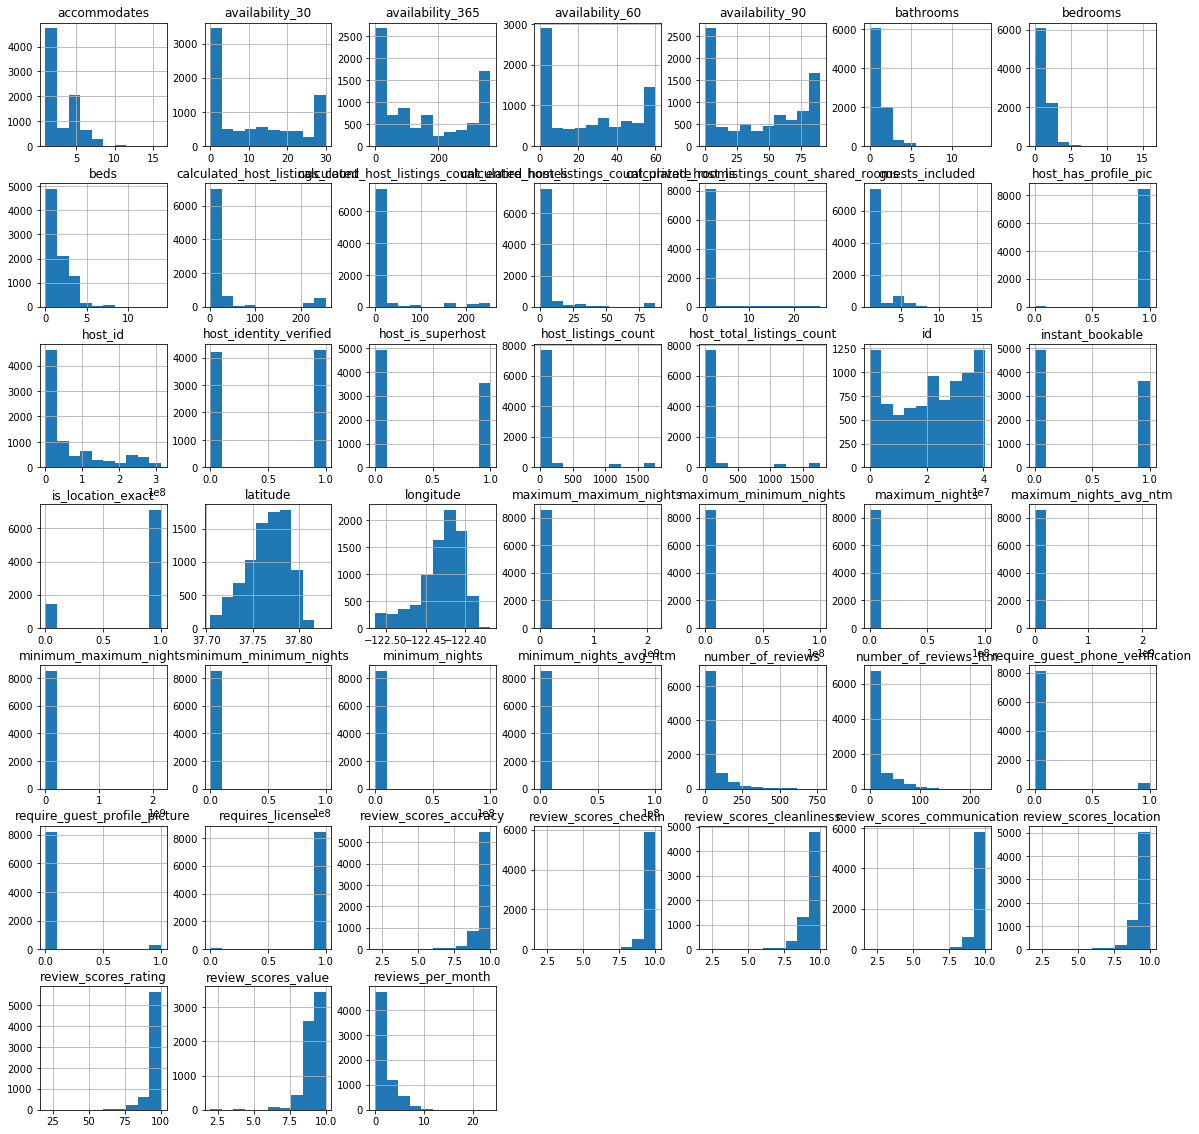

In [57]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20))
plt.show()

In [65]:
# based on the graphs above some of the columns seems to have mostly one value so will drop those
df.drop(['maximum_nights_avg_ntm' , 'minimum_nights_avg_ntm' , 'maximum_maximum_nights', 'minimum_maximum_nights', 'maximum_minimum_nights', 'minimum_minimum_nights','requires_license','require_guest_profile_picture','is_location_exact','host_listings_count','require_guest_phone_verification','host_has_profile_pic','minimum_nights','maximum_nights'], axis=1, inplace = True)

ValueError: labels ['maximum_nights_avg_ntm' 'minimum_nights_avg_ntm' 'maximum_maximum_nights'
 'minimum_maximum_nights' 'maximum_minimum_nights' 'minimum_minimum_nights'
 'requires_license' 'require_guest_profile_picture' 'is_location_exact'
 'host_listings_count' 'require_guest_phone_verification'] not contained in axis

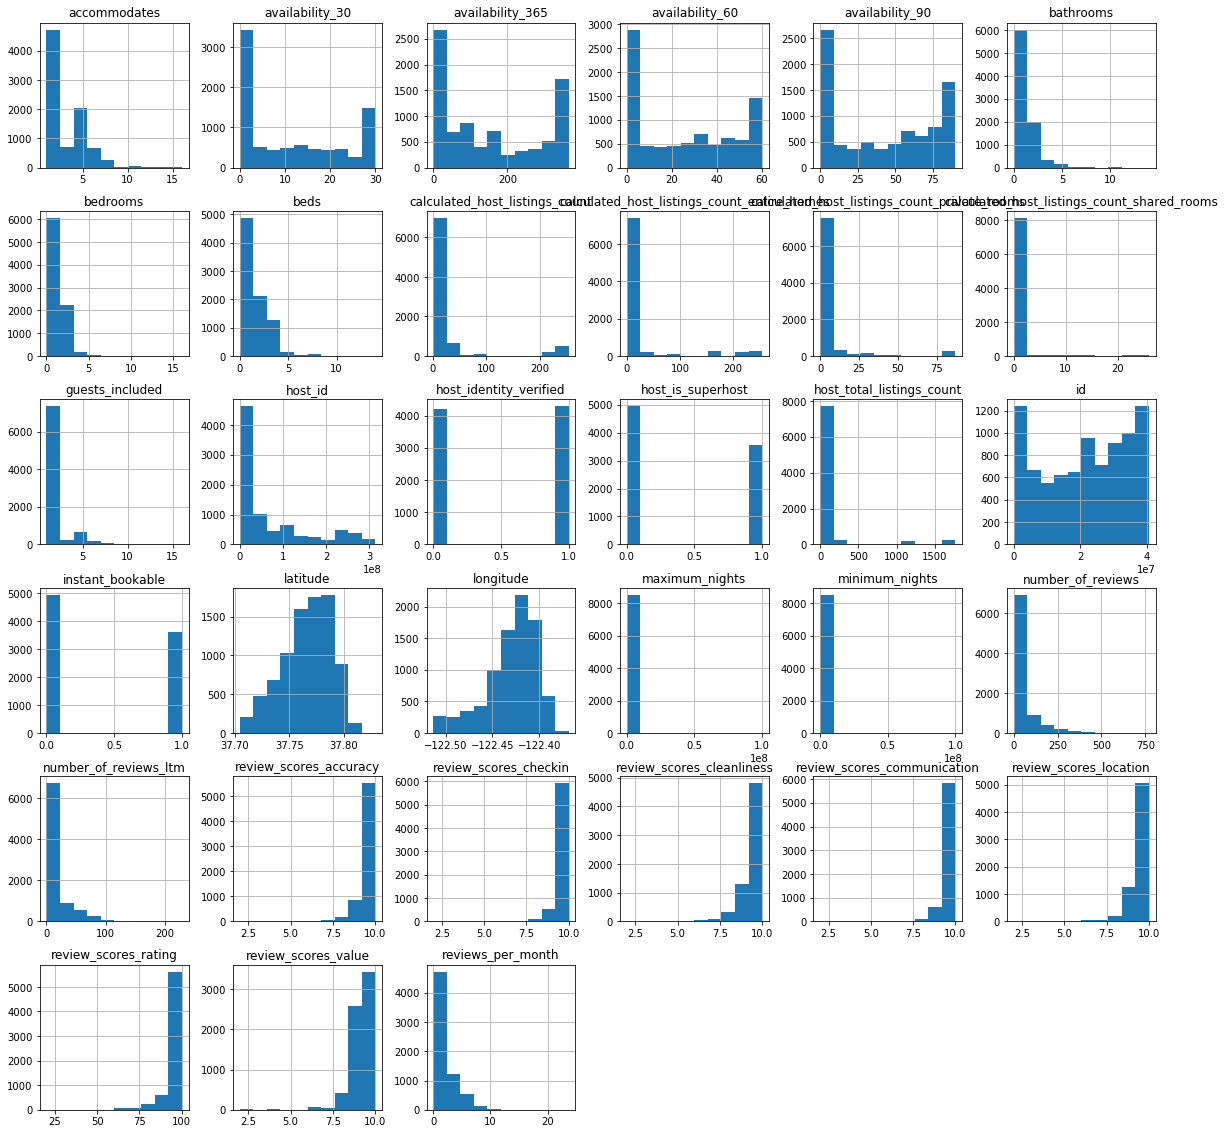

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Data columns (total 57 columns):
id                                              8533 non-null int64
host_id                                         8533 non-null int64
host_since                                      8479 non-null object
host_response_time                              7533 non-null object
host_response_rate                              7533 non-null object
host_is_superhost                               8479 non-null float64
host_total_listings_count                       8479 non-null float64
host_identity_verified                          8479 non-null float64
street                                          8533 non-null object
neighbourhood                                   8523 non-null object
neighbourhood_cleansed                          8533 non-null object
city                                            8523 non-null object
state                                           8526 non-null ob

In [69]:
df.head()


,id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,1169,2008-07-31,within a day,86%,1.0,1.0,1.0,"San Francisco, CA, United States",Duboce Triangle,Western Addition,San Francisco,CA,94117,San Francisco,"San Francisco, CA",37.76931,-122.43386,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",$170.00,$100.00,$100.00,2,$25.00,1,30,7 weeks ago,2,4,12,71,226,51,2009-07-23,2019-11-17,97.0,10.0,10.0,10.0,10.0,10.0,9.0,"{""SAN FRANCISCO""}",0,moderate,1,1,0,0,1.79
1,3850,4921,2008-12-08,within an hour,100%,1.0,2.0,1.0,"San Francisco, CA, United States",Inner Sunset,Inner Sunset,San Francisco,CA,94131,San Francisco,"San Francisco, CA",37.75402,-122.45805,House,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,Breakfast,""Free street ...",$99.00,$0.00,$10.00,2,$20.00,1,5,today,18,44,74,74,175,51,2009-07-16,2019-12-01,95.0,10.0,10.0,10.0,10.0,10.0,10.0,"{""SAN FRANCISCO""}",0,strict_14_with_grace_period,3,0,3,0,1.38
2,5858,8904,2009-03-02,within a day,60%,0.0,2.0,1.0,"San Francisco, CA, United States",Bernal Heights,Bernal Heights,San Francisco,CA,94110,San Francisco,"San Francisco, CA",37.74511,-122.42102,Apartment,Entire home/apt,5,1.0,2.0,3.0,Real Bed,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",$235.00,NaN,$100.00,2,$0.00,30,60,2 months ago,1,1,1,1,111,0,2009-05-03,2017-08-06,98.0,10.0,10.0,10.0,10.0,10.0,9.0,"{""SAN FRANCISCO""}",0,strict_14_with_grace_period,1,1,0,0,0.86
3,7918,21994,2009-06-17,within an hour,83%,1.0,10.0,1.0,"San Francisco, CA, United States",Cole Valley,Haight Ashbury,San Francisco,CA,94117,San Francisco,"San Francisco, CA",37.76669,-122.45250,Apartment,Private room,2,4.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free street parking...",$65.00,$200.00,$50.00,1,$12.00,32,60,3 weeks ago,30,60,90,365,18,1,2009-08-31,2019-09-10,86.0,8.0,8.0,9.0,9.0,9.0,8.0,"{""SAN FRANCISCO""}",0,strict_14_with_grace_period,9,0,9,0,0.14
4,8142,21994,2009-06-17,within an hour,83%,1.0,10.0,1.0,"San Francisco, CA, United States",Cole Valley,Haight Ashbury,San Francisco,CA,94117,San Francisco,"San Francisco, CA",37.76487,-122.45183,Apartment,Private room,2,4.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free street parking...",$65.00,$200.00,$50.00,1,$12.00,32,90,4 months ago,30,60,90,365,8,0,2014-09-08,2018-09-12,93.0,9.0,9.0,10.0,10.0,9.0,9.0,"{""SAN FRANCISCO""}",0,strict_14_with_grace_period,9,0,9,0,0.13


In [70]:
df.city.value_counts(dropna=False)


San Francisco                  8470
Daly City                        41
NaN                              10
San Francisco                     3
Brisbane                          1
Noe Valley - San Francisco        1
Daily city                        1
San Fàncisco                      1
San Franscisco                    1
San Jose                          1
South San Francisco               1
San Francisco, Hayes Valley       1
Nor cal                           1
Name: city, dtype: int64

In [71]:
df.street.value_counts(dropna=False)

San Francisco, CA, United States                  8460
Daly City, CA, United States                        41
CA, CA, United States                                9
San Francisco, United States                         6
San Francisco, Ca, United States                     4
San Francisco , CA, United States                    2
San Francisco, Hayes Valley, CA, United States       1
San Jose, CA, United States                          1
San Fàncisco, CA, United States                      1
US, United States                                    1
San Francisco , Ca, United States                    1
South San Francisco, CA, United States               1
Nor cal, CA, United States                           1
Brisbane, CA, United States                          1
San Franscisco, CA, United States                    1
Daily city , Ça, United States                       1
Noe Valley - San Francisco, CA, United States        1
Name: street, dtype: int64

In [72]:
df.state.value_counts(dropna=False)

CA     8520
NaN       7
Ca        5
Ça        1
Name: state, dtype: int64

In [73]:
df.market.value_counts(dropna=False)

San Francisco    8512
NaN                20
D.C.                1
Name: market, dtype: int64

In [74]:
df.smart_location.value_counts(dropna=False)

San Francisco, CA                  8460
Daly City, CA                        41
CA                                    9
San Francisco                         6
San Francisco, Ca                     4
San Francisco , CA                    2
US,                                   1
San Franscisco, CA                    1
Nor cal, CA                           1
Noe Valley - San Francisco, CA        1
San Francisco, Hayes Valley, CA       1
South San Francisco, CA               1
Daily city , Ça                       1
San Jose, CA                          1
San Fàncisco, CA                      1
Brisbane, CA                          1
San Francisco , Ca                    1
Name: smart_location, dtype: int64

In [75]:
df.jurisdiction_names.value_counts(dropna=False)

{"SAN FRANCISCO"}          8481
NaN                          51
{"Solano County"," CA"}       1
Name: jurisdiction_names, dtype: int64

In [76]:
df.property_type.value_counts()

Apartment             3466
House                 2375
Condominium            910
Guest suite            592
Boutique hotel         338
Hotel                  145
Townhouse              142
Loft                   132
Serviced apartment     110
Hostel                  77
Aparthotel              66
Guesthouse              45
Bed and breakfast       33
Other                   23
Resort                  18
Cottage                 17
Bungalow                15
Villa                    6
Castle                   6
Cabin                    3
Boat                     3
Tiny house               3
Camper/RV                2
Earth house              2
In-law                   2
Dome house               1
Hut                      1
Name: property_type, dtype: int64

In [77]:
df.bed_type.value_counts()

Real Bed         8461
Futon              32
Pull-out Sofa      21
Airbed             12
Couch               7
Name: bed_type, dtype: int64

In [78]:
# most have same bed type so will drop this
df.drop('bed_type', axis = 1, inplace=True)

In [80]:
amenities_list = list(df.amenities)
amenities_list

['{TV,"Cable TV",Internet,Wifi,Kitchen,"Pets live on this property",Dog(s),Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit",Essentials,Shampoo,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Self check-in",Keypad,"Private entrance","Pack ’n Play/travel crib","Room-darkening shades","Hot water",Microwave,"Coffee maker",Refrigerator,"Dishes and silverware",Oven}',
 '{Internet,Wifi,Kitchen,Breakfast,"Free street parking","Indoor fireplace",Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Fire extinguisher",Essentials,Shampoo,"High chair","Children’s books and toys","Pack ’n Play/travel crib","Hot water",Microwave,"Coffee maker",Refrigerator,"Dishes and silverware","Cooking basics",Oven,Stove,"Luggage dropoff allowed","Well-lit path to entrance","Host greets you"}',
 '{Internet,Wifi,Kitchen,Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","First 

In [83]:
df.describe()

,id,host_id,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,8.533000e+03,8.533000e+03,8479.000000,8479.000000,8479.000000,8533.000000,8533.000000,8533.000000,8528.000000,8530.000000,8521.000000,8533.000000,8.533000e+03,8.533000e+03,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,6601.000000,6596.000000,6596.000000,6595.000000,6597.000000,6595.000000,6595.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,6642.000000
mean,2.138645e+07,6.773439e+07,0.417856,101.524000,0.505366,37.766350,-122.429779,3.130435,1.403494,1.338804,1.726323,1.702098,1.173567e+04,1.225990e+04,10.966366,25.393179,41.709598,151.997539,44.785656,13.339623,95.524769,9.759248,9.611734,9.852464,9.825830,9.688400,9.383321,0.422009,27.760811,21.381695,5.352045,0.675026,1.842879
std,1.283860e+07,8.606154e+07,0.493235,340.811785,0.500001,0.022813,0.027010,1.897818,0.931233,0.927230,1.187167,1.327286,1.082553e+06,1.082548e+06,11.246103,22.508991,34.473555,136.858553,79.476654,22.385516,7.258059,0.703041,0.804334,0.564258,0.629148,0.716657,0.840563,0.493909,66.028408,58.987020,15.875233,3.354536,2.077444
min,9.580000e+02,2.800000e+01,0.000000,0.000000,0.000000,37.704480,-122.513060,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,9.779327e+06,4.430421e+06,0.000000,1.000000,0.000000,37.751770,-122.442520,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000e+00,2.900000e+01,0.000000,0.000000,1.000000,13.000000,1.000000,0.000000,95.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.290000
50%,2.259754e+07,2.374145e+07,0.000000,2.000000,1.000000,37.769780,-122.424060,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000e+00,1.800000e+02,8.000000,24.000000,44.000000,112.000000,9.000000,2.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,3.270356e+07,1.074344e+08,1.000000,16.000000,1.000000,37.785570,-122.410500,4.000000,1.500000,2.000000,2.000000,2.000000,3.000000e+01,1.125000e+03,21.000000,46.000000,75.000000,304.000000,52.000000,17.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,11.000000,2.000000,2.000000,0.000000,2.780000
max,4.056928e+07,3.136827e+08,1.000000,1768.000000,1.000000,37.828790,-122.368570,16.000000,14.000000,16.000000,14.000000,16.000000,1.000000e+08,1.000000e+08,30.000000,60.000000,90.000000,365.000000,771.000000,229.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,254.000000,254.000000,87.000000,26.000000,23.680000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Data columns (total 56 columns):
id                                              8533 non-null int64
host_id                                         8533 non-null int64
host_since                                      8479 non-null object
host_response_time                              7533 non-null object
host_response_rate                              7533 non-null object
host_is_superhost                               8479 non-null float64
host_total_listings_count                       8479 non-null float64
host_identity_verified                          8479 non-null float64
street                                          8533 non-null object
neighbourhood                                   8523 non-null object
neighbourhood_cleansed                          8533 non-null object
city                                            8523 non-null object
state                                           8526 non-null ob